## Data analysis code for gain=5000 data taken on 07/14/2025.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import re
import os
from scipy import optimize
from scipy.ndimage import gaussian_filter
import h5py

# Binning 1x1

In [201]:
folder_path_day = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\07\14'
seq = 17 #sequence number

2025-07-14_0043_BaF_Fluorescence_07.h5


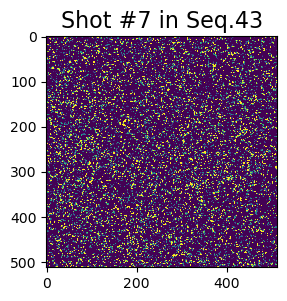

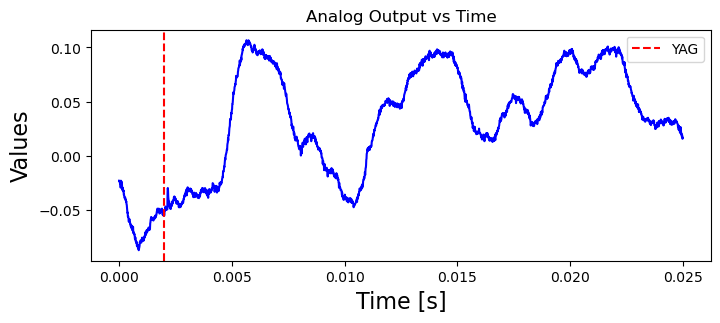

In [198]:
##Show Absorption and FLuorescence plots of a shot
shot_number =7 #Choose shot number you want to see

folder_path = folder_path_day + '\\%.4i'%seq
for count_b, filename in enumerate(os.listdir(folder_path)):
      if count_b==shot_number: 
          file_path = os.path.join(folder_path, filename)
          print(filename)
          with h5py.File(file_path, 'r') as file:
            image_data = file['images/camera/fluorescence/frame'][:]
            analog_data=file['data/traces/Absorption'][:]
            # print(analog_data)
            times, values = zip(*analog_data)
            # Convert to NumPy arrays if needed
            times = np.array(times)
            values = np.array(values)
            tYAG=2e-3 # Hardcoded for now...
            fig = plt.figure(2, figsize=(3, 3))
            plt.imshow(image_data, vmin = 1550, vmax = 1600)
            plt.title('Shot #%i in Seq.%i' % (shot_number, seq), fontsize=16)
            
            fig = plt.figure(4, figsize=(8, 3))
            plt.plot(times, values, 'b')
            plt.axvline(x=tYAG, color='r', linestyle='--', label='YAG')
            plt.xlabel('Time [s]', fontsize=16)
            plt.ylabel('Values', fontsize=16)
            plt.title('Analog Output vs Time')
            plt.legend()  # Add this if you want the 'YAG' label to show
            plt.show()

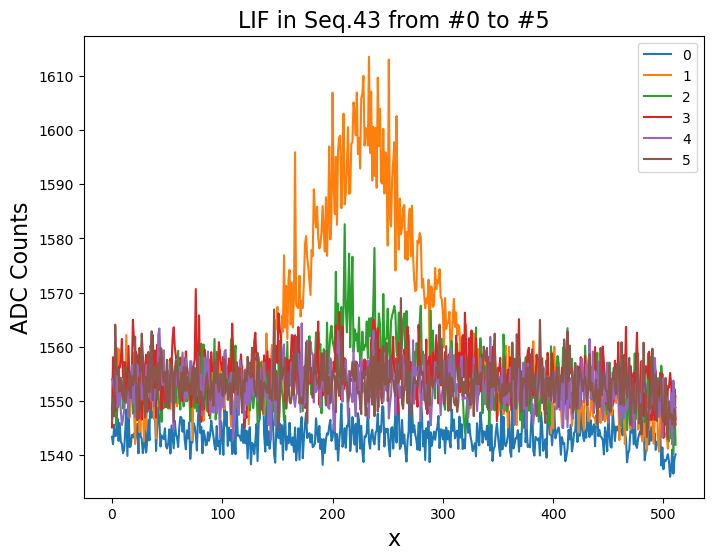

In [199]:
count_b_start=0
count_b_end=5
sum_array=[]
fig = plt.figure(20, figsize=(8,6))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    # print(filename)
    if count_b<=count_b_end and count_b>=count_b_start:
        with h5py.File(file_path, 'r') as file:
            image_data = file['images/camera/fluorescence/frame'][:]
            cross_section_x = np.mean(image_data, axis=0)
            # if np.any(cross_section_x>1550):
            plt.plot(np.arange(512),cross_section_x, label=count_b)
            # print(count_b)
            # print(np.sum(cross_section_x))
            sum_array.append(np.sum(cross_section_x))
            # else:
                # plt.plot(np.arange(512),cross_section_x, label='')


# plt.ylim([1528,1660])
plt.xlabel('x', fontsize=16)
# plt.title('Shots in Seq.7', fontsize=16)
plt.title('LIF in Seq.%i from #%i to #%i' %(seq, count_b_start, count_b_end), fontsize=16)
plt.ylabel('ADC Counts', fontsize=16)
plt.legend()
plt.show()



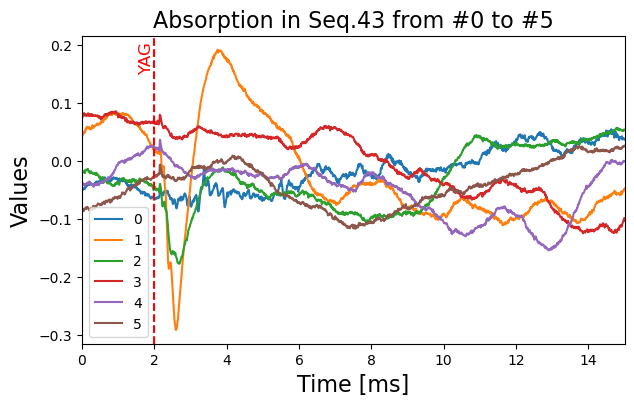

In [200]:
# ABSORPTION
plt.close()
count_b_start=0
count_b_end=5
sum_array=[]

fig = plt.figure(20, figsize=(7,4))
# get x-cross section for every shot in the sequence
for count_b, filename in enumerate(os.listdir(folder_path)): 
    file_path = os.path.join(folder_path, filename)
    # print(filename)
    if count_b<=count_b_end and count_b>=count_b_start: #POINT WE STOPPED TAKING DATA...
        # if count_b%10==2:
        # print(count_b)
        with h5py.File(file_path, 'r') as file:
            analog_data=file['data/traces/Absorption'][:]
            # print(analog_data)
            times, values = zip(*analog_data)
            # Convert to NumPy arrays if needed
            times = np.array(times)*1000
            values = np.array(values)
            if np.any(values<1.7):
                if not np.any(values<1.6):
                    print(count_b)
            plt.plot(times, values, label=count_b)


tYAG=2 # [ms], Hardcoded for now...
plt.text(tYAG, plt.ylim()[1]*0.95, 'YAG', color='r', fontsize=12, rotation=90,
         verticalalignment='top', horizontalalignment='right')
plt.axvline(x=tYAG, color='r', linestyle='--')
plt.xlabel('Time [ms]', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.xlim([0,15])
plt.title('Absorption in Seq.%i from #%i to #%i' %(seq, count_b_start, count_b_end), fontsize=16)
plt.legend()  # Add this if you want the 'YAG' label to show
plt.show()

